# 12.1 - An Introduction to the NLTK

This file introduces the reader to the Python Natural Langauge Toolkit (NLTK).

The Python NLTK is a set of modules and corpora enabling the reader to do natural langauge processing against corpora of one or more texts. It goes beyond text minnig and provides tools to do machine learning, but this notebook barely scratches that surface. The intention of this notebook is to provide the reader with exposure to numerous natural language processing techniques that are used in text preprocessing and analysis.

Through the use of this Notebook, the reader ought to be able to get a flavor for what the Toolkit can do without the need to completly understand the Python language.

Quoted text is as defined on the subject matters Wikipedia page.

--  
*Created*<br>
Eric Lease Morgan _<emorgan@nd.edu_><br>
April 12, 2018<br>
*Modified*<br>
Tyler Bikaun _<tyler.bikaun@research.uwa.edu.au_><br>
March 24, 2019<br>

### Loading Packages

In [1]:
# NLTK
import nltk
from nltk.corpus import stopwords, reuters
from nltk.stem import PorterStemmer

### Loading text data
There are two types of data that can be used within this notebook. The first is the novel `shakespeare-hamlet` and the second is a selection of news articles provided by Reuters on the topic of `gold`.

Accessed under the The Project Gutenberg License

Source: https://www.gutenberg.org/files/205/205-0.txt

In [2]:
data_type = 'shakespeare'

In [3]:
if data_type == 'shakespeare':
    data = " ".join(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))
elif data_type == 'gold':
    data = " ".join(reuters.words(reuters.fileids('gold')))
else:
    print('Please check the data type you specified as it is incorrect')
    raise ValueError

## Natural Language Processing
Agenda:
1.   Tokenization
2.   Stop Words
3.   Feature distributions
4.   N-grams
5.   Stemming
6.   Concordancing
7.   Dispersion Plotting
8.   Bi-gram Signifiance
9.   Word contexts
10.  Word similarities
11.  Parts-of-Speech (POS)
12.  Named entity extraction


### Tokenization
**Tokenization:** "Tokenization is the process of demarcating and possibly classifying sections of a string of input characters. The resulting tokens are then passed on to some other form of processing."<br>

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

[analyticsvidhya](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

In [4]:
# Import tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Tokenize the data into features (words) and display 10 of them
features = nltk.word_tokenize(data)
print(features[:10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']


In [6]:
# Normalize the features to lower case and exclude punctuation and display 10 of them
features = [feature for feature in features if feature.isalpha()]
features = [feature.lower() for feature in features]
print(features[:10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'actus', 'primus', 'scoena']


### Stop Words
**Stop words:** "Stop words usually refers to the most common words in a language, there is no single universal list of stop words"

![alt text](https://www.socialtalent.com/wp-content/uploads/2016/09/Screen-Shot-2016-09-01-at-15.01.32.png)

In [7]:
# Import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Create a list of (English) stopwords, and then remove them from the features
stopwords = stopwords.words('english')
features = [feature for feature in features if feature not in stopwords]

### Feature (word) distribution
- What are word frequencies? Should we remove more stopwords?

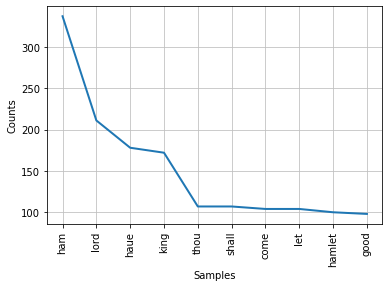

In [9]:
# Count & tabulate the features, and then plot the results
frequencies = nltk.FreqDist(features)
plot = frequencies.plot(10)

In [32]:
# Create a list of unique words (hapaxes; occur only once) and display them - these are rare words.
hapaxes = frequencies.hapaxes()
print("\n".join(hapaxes[:10]))

William
Shakespeare
1599
Primus
Scoena
Prima
Centinels
carefully
strook
releefe


### N-grams
**n-gram:** "an n-gram is a contiguous sequence of n items from a given sample of text or speech."

![alt text](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

[deepai](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

In [11]:
# Similar to before, let's compute the frequencies of bi-grams (word pairs)
# Count & tabulate ngrams from the features.
ngrams = nltk.ngrams(features, 2)
frequencies = nltk.FreqDist(ngrams)

# Show the most common bi-grams
frequencies.most_common(10)

[(('lord', 'ham'), 70),
 (('good', 'lord'), 23),
 (('hamlet', 'ham'), 15),
 (('enter', 'king'), 15),
 (('wee', 'l'), 13),
 (('haue', 'seene'), 12),
 (('lord', 'hamlet'), 11),
 (('ham', 'oh'), 10),
 (('hor', 'lord'), 10),
 (('ham', 'sir'), 10)]

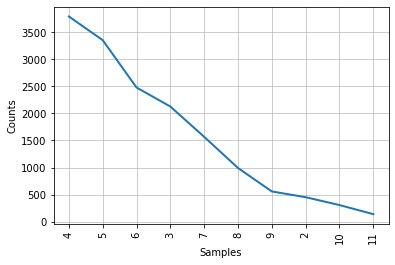

In [12]:
# Create a list each token's length, and plot the result; How many "long" words are there?
lengths = [len(feature) for feature in features]
plot = nltk.FreqDist(lengths).plot(10)

### Stemming
**Stemming:** "stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form."

![alt text](https://kavita-ganesan.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-15-at-2.01.37-PM.png)

[kavita ganesan](https://kavita-ganesan.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-15-at-2.01.37-PM.png)

In [13]:
# Initialize a stemmer, stem the features, count & tabulate, and output
stemmer = PorterStemmer()
stems = [stemmer.stem(feature) for feature in features]
frequencies = nltk.FreqDist(stems)
frequencies.most_common(10)

[('ham', 337),
 ('lord', 216),
 ('king', 180),
 ('haue', 178),
 ('come', 128),
 ('hamlet', 107),
 ('let', 107),
 ('thou', 107),
 ('shall', 107),
 ('good', 98)]

## Preparing text
For the next section of this notebook, we need to recreate our text into features and conver them into an NLTK 'Text' object. This allows us to do concordancing and other interesting things.

In [14]:
# Re-create the features and create a NLTK Text object, so other cool things can be done
features = nltk.word_tokenize(data)
text = nltk.Text(features)

In [15]:
# Count & tabulate, again; list a given word -- try different words!
# If you're using shakespeare data - try Lord
# If you're using gold data - try Perth
frequencies = nltk.FreqDist(text)
print(frequencies['Lord'])

211


### Concordancing
Cordandancing: "A concordance is an alphabetical list of the principal words used in a book or body of work, listing every instance of each word with its immediate context."

![alt text](https://orange3-text.readthedocs.io/en/latest/_images/Concordance-stamped.png)

[orange3](https://orange3-text.readthedocs.io/en/latest/_images/Concordance-stamped.png)

In [16]:
# Do keyword-in-context searching against the text (concordancing)
# If you're using shakespeare data - try Lord
# If you're using gold data - try Perth
print(text.concordance('Lord'))

Displaying 25 of 211 matches:
 thou haue Laertes ? Laer . Dread my Lord , Your leaue and fauour to returne t
t sayes Pollonius ? Pol . He hath my Lord : I do beseech you giue him leaue to
 still hang on you ? Ham . Not so my Lord , I am too much i ' th ' Sun Queen .
do forget my selfe Hor . The same my Lord , And your poore Seruant euer Ham . 
rg Horatio ? Marcellus Mar . My good Lord Ham . I am very glad to see you : go
Hor . A truant disposition , good my Lord Ham . I would not haue your Enemy sa
inke deepe , ere you depart Hor . My Lord , I came to see your Fathers Funeral
e my Mothers Wedding Hor . Indeed my Lord , it followed hard vpon Ham . Thrift
es I see my father Hor . Oh where my Lord ? Ham . In my minds eye ( Horatio ) 
t look vpon his like againe Hor . My Lord , I thinke I saw him yesternight Ham
sternight Ham . Saw ? Who ? Hor . My Lord , the King your Father Ham . The Kin
 Ham . But where was this ? Mar . My Lord vpon the platforme where we watcht H
 Did you not speake to

## Dispersion Plot
A method for displaying lexical dispersion.

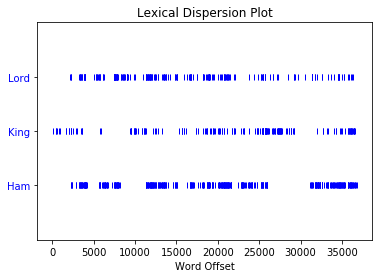

In [17]:
# Create a dispersion plot of given words
# If you're using shakespeare data - try ['Lord', 'King', 'Ham']
# If you're using gold data - try ['Perth', 'Australia', 'Adelaide', 'Gold']
plot = text.dispersion_plot(['Lord', 'King', 'Ham'])

## Bi-gram significance
Determine which bi-grams are the most significant considering a defined window size.

> Collocations are expressions of multiple words which commonly co-occur.

In [30]:
# output the "most significant" bigrams, considering surrounding words (size of window) -- Try different window sizes.
text.collocation_list(num=10, window_size=4)

['Lord Ham',
 'Enter King',
 'Rosincrance Guildensterne',
 'haue seene',
 'Exeunt Enter',
 'Fathers death',
 'Enter Queene',
 'Enter Polonius',
 'set downe',
 'Heauen Earth']

## Common word context
Common word contexts allows us to examine the contexts that are shared by two or more words

In [23]:
# Given a set of words, what words are nearby
# If you're using shakespeare data - try ['Lord', 'King']
# if you're using gold data - try ['Mine', 'Gold']
text.common_contexts(['Lord', 'King'])

my_,


## Word similarities
What words are similar to each other?
This implementation should be remembered when we look at *word embeddings*. 

The method that is implemented by NLTK is "Distributional similarity: find other words which appear in the same contexts as the specified word."

In [24]:
# List the words (features) most associated with the given word
# If you're using Shakespeare data - Try Lord
# If you're using gold data - Try Gold
text.similar('King')

ham laer qu queene play hamlet hor polon ghost pol horatio ophe matter
rosin mar time day polonius first rest


In [25]:
# create a list of sentences, and display one -- season to taste
sentences = nltk.sent_tokenize(data)
sentence  = sentences[14]
print(sentence)

Haue you had quiet Guard ?


## Parts-of-speech (POS)
**POS:** "part of speech is a category of words (or, more generally, of lexical items) that have similar grammatical properties. Words that are assigned to the same part of speech generally display similar syntactic behavior—they play similar roles within the grammatical structure of sentences—and sometimes similar morphology in that they undergo inflection for similar properties."

![alt text](https://1.bp.blogspot.com/-spGNcdlw7g4/XHY5fS25uVI/AAAAAAAABqY/63lfyQFHkl4rf1ls0vvLIBRRc8TEsBZvgCLcBGAs/s640/Capture.PNG)

[thinkifi](https://1.bp.blogspot.com/-spGNcdlw7g4/XHY5fS25uVI/AAAAAAAABqY/63lfyQFHkl4rf1ls0vvLIBRRc8TEsBZvgCLcBGAs/s640/Capture.PNG)

In [26]:
# Import perceptron tagger
# POS is a supervised learning process so we need to load in a ML model to aid us.
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
# Tokenize the sentence and parse it into parts-of-speech, all in one go.
sentence = nltk.pos_tag(nltk.word_tokenize(sentence))
print(sentence)

[('Haue', 'NNP'), ('you', 'PRP'), ('had', 'VBD'), ('quiet', 'JJ'), ('Guard', 'NNP'), ('?', '.')]


## Named entity extraction
**Chunking:** "Chunking is a process of extracting phrases from unstructured text."<br>

![alt text](https://www.tutorialkart.com/wp-content/uploads/2017/06/chunker_ex.png)

[tutorialkart](https://www.tutorialkart.com/wp-content/uploads/2017/06/chunker_ex.png)

In [28]:
# Import chunker and wordlist corpus
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [29]:
# Extract named enities from a sentence, and print the results
# chunking
entities = nltk.ne_chunk(sentence)
print(entities)

(S Haue/NNP you/PRP had/VBD quiet/JJ (PERSON Guard/NNP) ?/.)


### Visualisation Tree

Output the entities graphically. Currently doesn't work in Google Colab, however the image shown is similar to what would be expected.

In [ ]:
# entities

![Entity Tree](https://www.nltk.org/book/tree_images/ch07-tree-2.png)

[NLTK](https://www.nltk.org/book/tree_images/ch07-tree-2.png)

This is the end of the Notebook. I hope you found it useful.